In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [6]:
numpy_img = np.load('FullyProcessedCelebA/3452.npy')

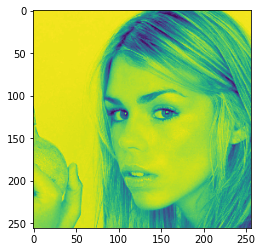

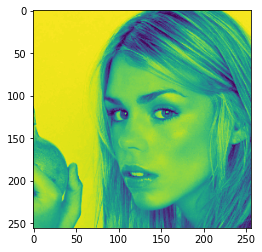

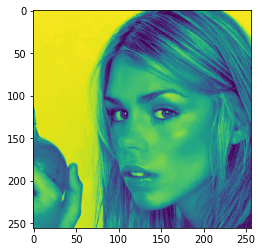

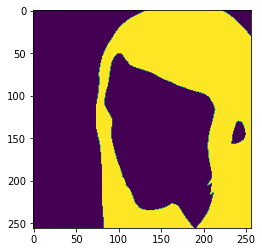

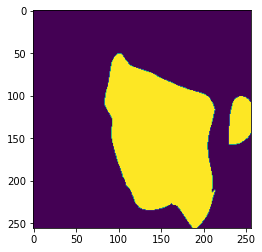

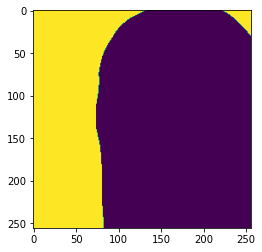

In [9]:
for i in range(6):
    plt.imshow(numpy_img[:,:,i])
    plt.show()

In [7]:
print(numpy_img.shape)
mask_names = ['r', 'g', 'b', 'skin', 'nose', 'eye_g', 'l_eye', 'r_eye', 'l_brow', 'r_brow', 'l_ear', 'r_ear', 'mouth', 'u_lip', 'l_lip', 'hair', 'hat', 'ear_r', 'neck_l', 'neck', 'cloth', 'background']

(256, 256, 6)


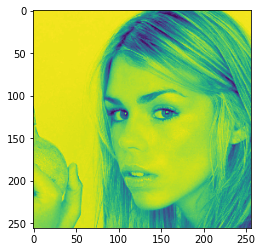

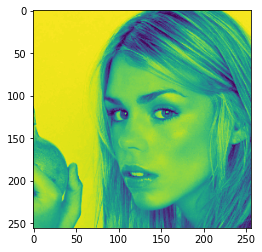

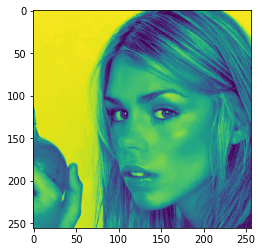

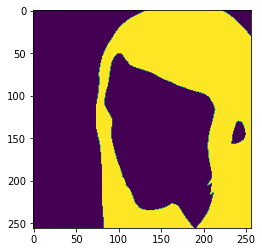

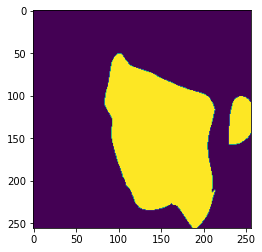

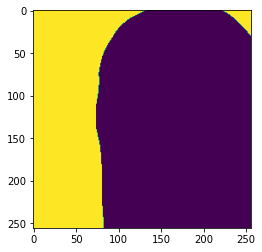

IndexError: index 6 is out of bounds for axis 2 with size 6

In [8]:
imgs = {}
for i, label in enumerate(mask_names):
    imgs[label] = numpy_img[:,:,i]
    plt.imshow(imgs[label])
    plt.show()

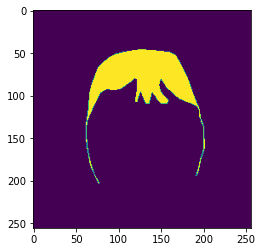

In [165]:
overlap = np.bitwise_and(imgs['hair'], imgs['skin'])
plt.imshow(overlap)
plt.show()

So we would check for hair first and put 1 in that channel if there is hair
Then face, put 1 if there is face AND there is no hair
And background if there is neither
Neck and ears should probably be part of face
Include neck and hat as part of hair

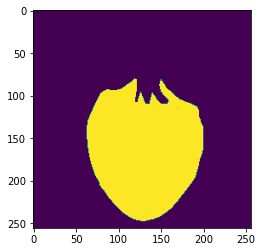

In [175]:
new_face[:]=imgs['skin']
new_face[new_face==imgs['hair']] = False
plt.imshow(new_face)
plt.show()

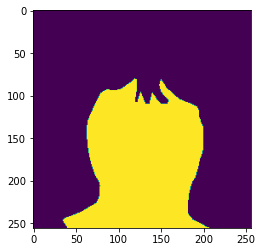

In [176]:
test_face = np.bitwise_or(new_face, imgs['neck'])
plt.imshow(test_face)
plt.show()